# PCA

## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

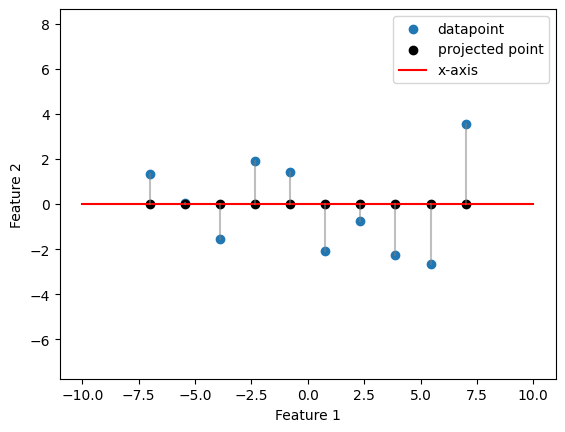

In [6]:
np.random.seed(23)

n_data = 10
a = 0
b = 0

x = np.linspace(-7, 7, n_data)
y = a*x + b + np.random.normal(loc=0, scale=2, size=n_data)

x_proj = (a * (y - b) + x) / (a**2 + 1)
y_proj = a * x_proj + b

plt.axis('equal')
plt.scatter(x, y, label='datapoint')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(x_proj, y_proj, label='projected point', color='black')
plt.plot([-10,10], [a*-10+b, a*10+b], color='red', label=f'x-axis')

for i in range(n_data):
    plt.plot([x[i], x_proj[i]], [y[i], y_proj[i]], color='gray', alpha=0.5)

plt.legend()
plt.savefig('./slide/img/dp.pdf', bbox_inches='tight')

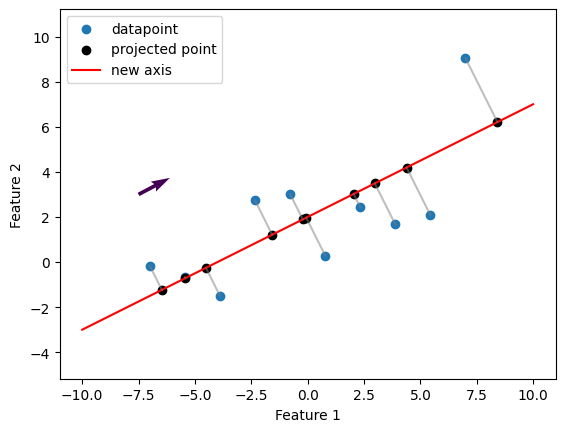

In [28]:
np.random.seed(23)

n_data = 10
a = 0.5
b = 2

x = np.linspace(-7, 7, n_data)
y = a*x + b + np.random.normal(loc=0, scale=2, size=n_data)

x_proj = (a * (y - b) + x) / (a**2 + 1)
y_proj = a * x_proj + b

plt.axis('equal')
plt.scatter(x, y, label='datapoint')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(x_proj, y_proj, label='projected point', color='black')
plt.plot([-10,10], [a*-10+b, a*10+b], color='red', label=f'new axis')

for i in range(n_data):
    plt.plot([x[i], x_proj[i]], [y[i], y_proj[i]], color='gray', alpha=0.5)

# direction of data
M = np.stack([x, y], axis=1)
M_centered = M - np.mean(M, axis=0)
e_values, e_vectors = np.linalg.eig(np.cov(M_centered.T))

origin = [-7.5, 3]
idx = np.argmax(e_values)
plt.quiver(origin[0], origin[1], e_vectors[0,idx], e_vectors[1,idx], 3, scale=14)

plt.legend()
plt.savefig('./slide/img/dp1.pdf', bbox_inches='tight')

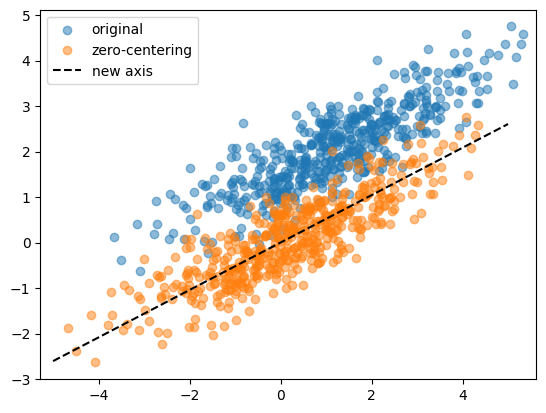

In [18]:
np.random.seed(23)

n_data = 500
X = np.random.multivariate_normal(mean=[1,2], cov=np.array([[3, 1.5], [1.5, 1]]), size=(n_data,))
cov = np.cov(X.T) # in np.cov: column = observation, row = variable
e_values, e_vectors = np.linalg.eig(cov)

'''
dù chiếu dữ liệu đã 0-centering hay dữ liệu gốc thì phương sai vẫn được bảo toàn
'''
plt.axis('equal')
plt.scatter(x=X[:,0], y=X[:,1], alpha=0.5, label='original')
plt.scatter(x=X[:,0]-1, y=X[:,1]-2, alpha=0.5, label='zero-centering')

# draw e_vector
# origin = [0.,1.]
idx = np.argmax(e_values)
# plt.quiver(origin[0], origin[1], e_vectors[0, idx], e_vectors[1, idx], color='black', scale=10)

# draw the red line via `phương trình tham số của đường thẳng`
# đường thẳng đi qua O(0,0)
t = -5/e_vectors[0, idx]
plt.plot([-5,5], [e_vectors[1,idx]*t, -e_vectors[1,idx]*t], '--', label='new axis', color='black')

plt.legend()
plt.savefig('./slide/img/dp2.pdf', bbox_inches='tight')

## PCA on an image

In [7]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks

In [8]:
def load_image(path, gray=True):
    img = cv2.imread(path)
    if gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def extract_patches(image, patch_size):
    h, w = image.shape
    assert h % patch_size == 0 and w % patch_size == 0, "Image size must be divisible by patch size"
    patches = view_as_blocks(image, block_shape=(patch_size, patch_size))
    patches = patches.reshape(-1, patch_size, patch_size)  # (num_patches, patch_h, patch_w)
    return patches

def patches_to_matrix(patches):
    num_patches = patches.shape[0]
    return patches.reshape(num_patches, -1)  # (num_patches, patch_size*patch_size)

def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    return X_pca, X_reconstructed, pca

def show_reconstructed_patches(patch_vectors, original_shape, patch_size):
    num_patches = patch_vectors.shape[0]
    h_patches, w_patches = original_shape[0] // patch_size, original_shape[1] // patch_size
    patches = patch_vectors.reshape(num_patches, patch_size, patch_size)

    # Khôi phục ảnh từ patch
    reconstructed = np.zeros(original_shape, dtype=np.uint8)
    idx = 0
    for i in range(h_patches):
        for j in range(w_patches):
            reconstructed[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = patches[idx]
            idx += 1
    return reconstructed

In [9]:
# ----main-----
image_path = "img.png"
patch_size = 16

img = load_image(image_path, gray=True)
patches = extract_patches(img, patch_size)
X = patches_to_matrix(patches)

list_inv_img = {}
for n_c in [1]:
    X_pca, X_reconstructed, pca_model = apply_pca(X, n_components=n_c)
    inv_img = show_reconstructed_patches(X_reconstructed, img.shape, patch_size)
    list_inv_img[n_c] = (inv_img, np.linalg.norm(img - inv_img, ord=2))
    break

In [10]:
list_inv_img[1]

(array([[152, 153, 155, ..., 102, 103, 103],
        [152, 154, 155, ..., 102, 103, 103],
        [153, 154, 156, ..., 102, 103, 103],
        ...,
        [ 69,  67,  65, ...,  67,  70,  72],
        [ 69,  67,  65, ...,  68,  70,  73],
        [ 68,  67,  65, ...,  70,  71,  74]], shape=(512, 512), dtype=uint8),
 np.float64(63288.50938880384))

In [31]:
# ----main-----
image_path = "img.png"
patch_size = 16

img = load_image(image_path, gray=True)
patches = extract_patches(img, patch_size)
X = patches_to_matrix(patches)

list_inv_img = {}
for n_c in range(250, 0, -10):
    X_pca, X_reconstructed, pca_model = apply_pca(X, n_components=n_c)
    inv_img = show_reconstructed_patches(X_reconstructed, img.shape, patch_size)
    list_inv_img[n_c] = (inv_img, np.linalg.norm(img - inv_img, ord=2))

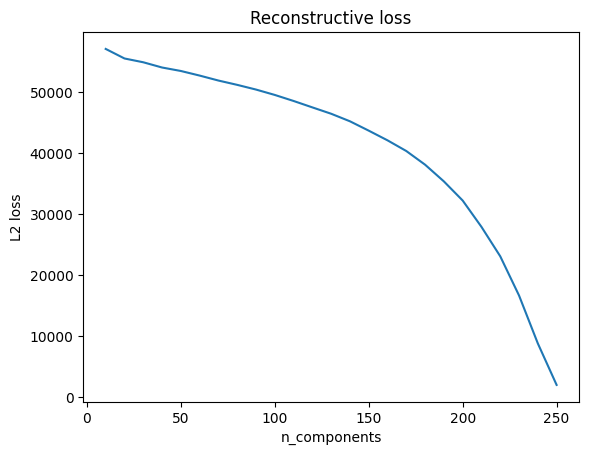

In [48]:
plt.plot(list_inv_img.keys(), [list_inv_img[k][1] for k in list_inv_img.keys()])
# plt.scatter(list_inv_img.keys(), [list_inv_img[k][1] for k in list_inv_img.keys()])
plt.title('Reconstructive loss')
plt.xlabel('n_components')
plt.ylabel('L2 loss')
plt.savefig('./slide/img/lena_compress_loss.pdf', bbox_inches='tight')

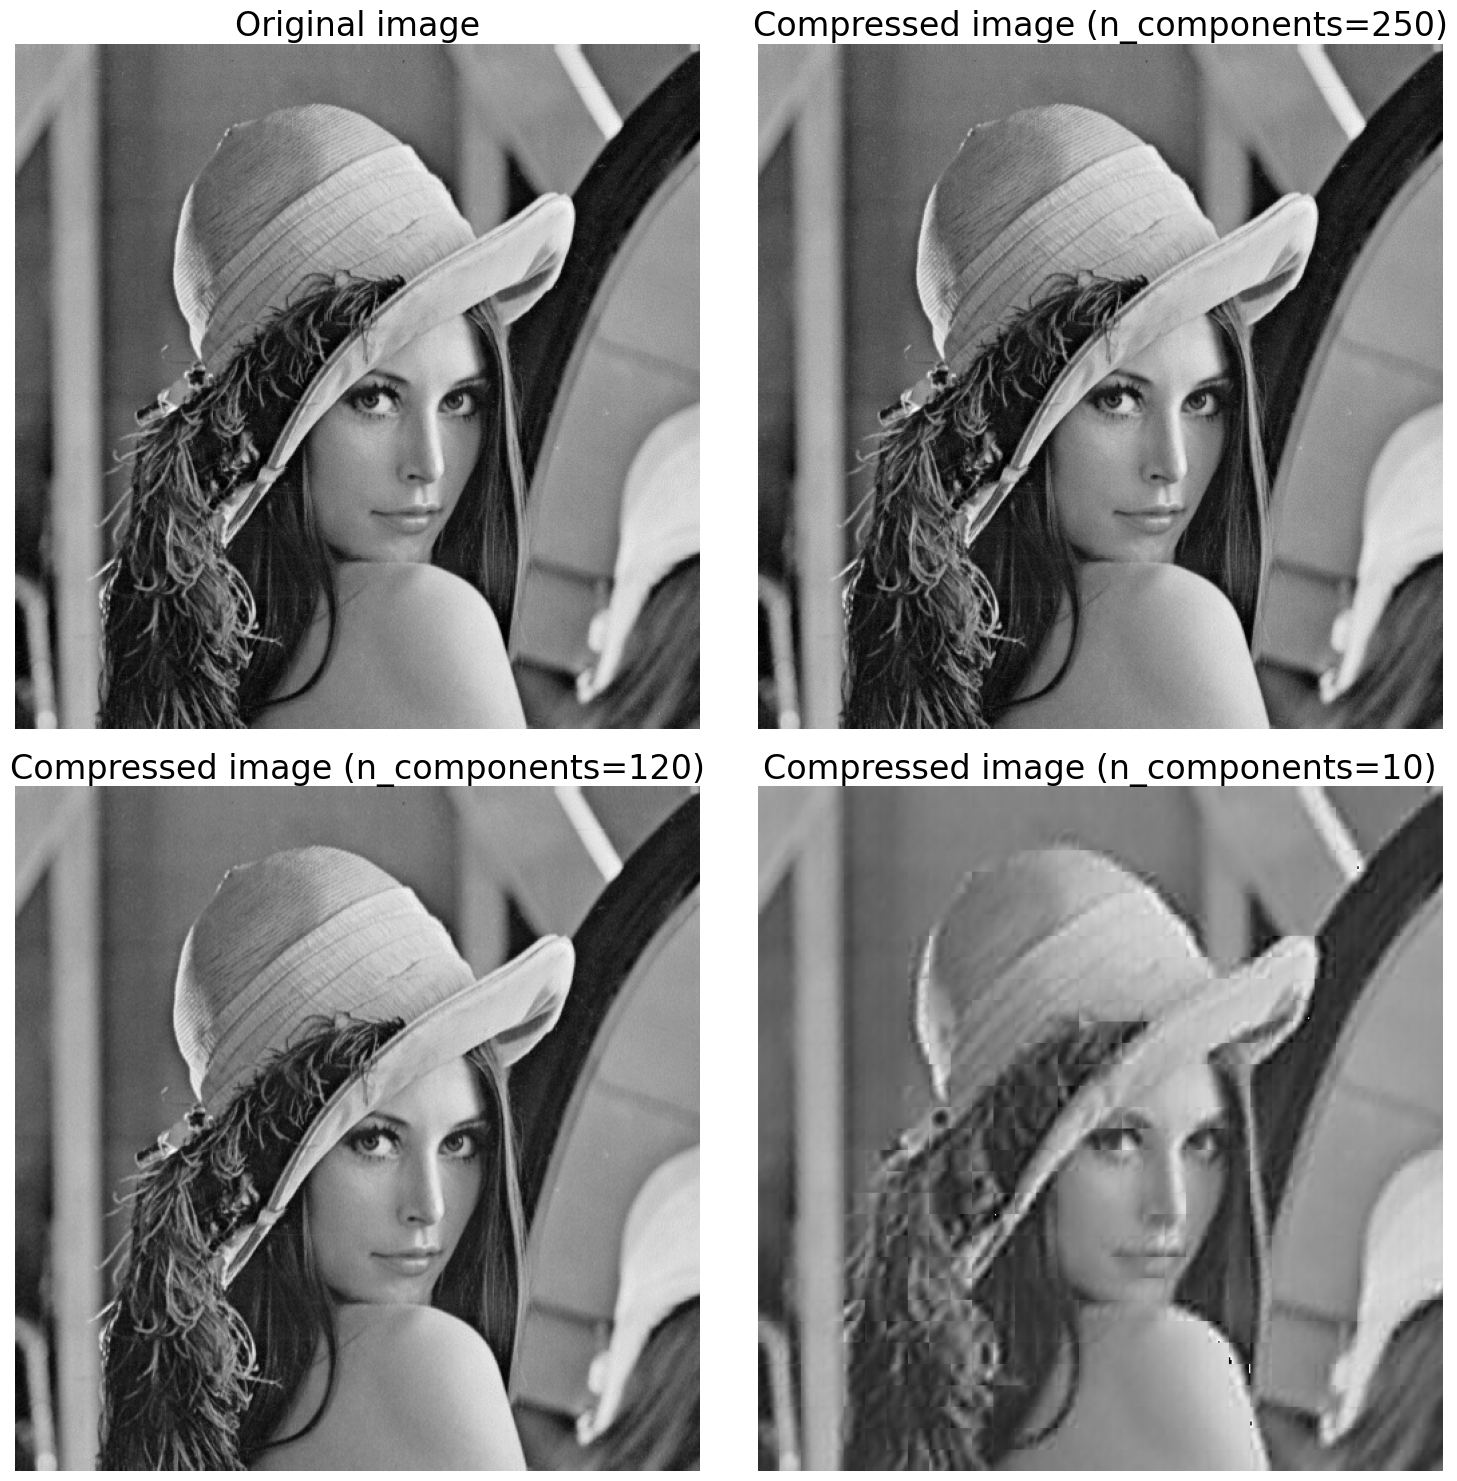

In [ ]:
fig = plt.figure(figsize=(15,15))
axs0 = fig.subplots(2,2)
plt.tight_layout()

n_comp = [250, 120, 10]
count = 0
for i in range(2):
    for j in range(2):
        if i == 0 and j == 0:
            axs0[i][j].imshow(img, cmap='gray')
            axs0[i][j].set_title('Original image', fontsize=24)
            axs0[i][j].axis('off')
        else:
            axs0[i][j].imshow(list_inv_img[n_comp[count]][0], cmap='gray')
            axs0[i][j].set_title(f'Compressed image (n_components={n_comp[count]})', fontsize=24)
            axs0[i][j].axis('off')
            count += 1

# axs0[0].imshow(img, cmap='gray')
# axs0[0].set_title('Original img')

# n_components = 250
# axs0[1].imshow(list_inv_img[n_components][0], cmap='gray')
# axs0[1].set_title(f'PCA img (n_components={n_components})')

plt.savefig('./slide/img/lena_compress.pdf', bbox_inches='tight')

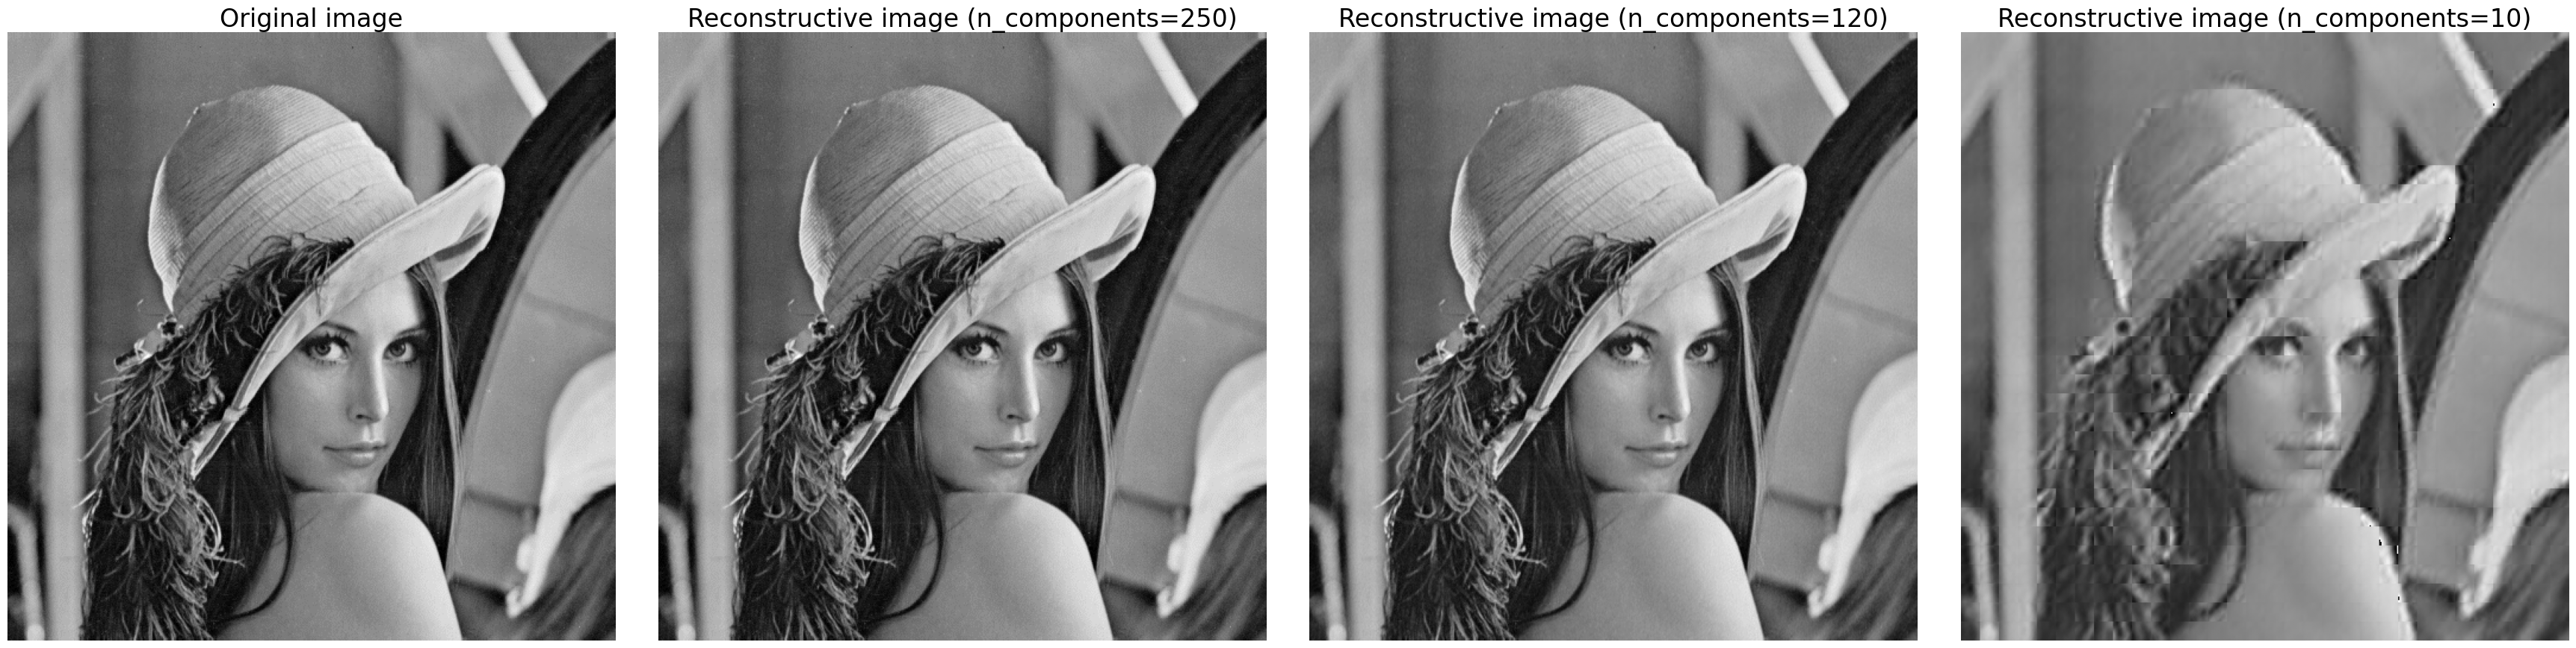

In [47]:
fig = plt.figure(figsize=(35,15))
axs0 = fig.subplots(1,4)
plt.tight_layout()

n_comp = [250, 120, 10]
count = 0
for i in range(4):
    if i == 0:
        axs0[i].imshow(img, cmap='gray')
        axs0[i].set_title('Original image', fontsize=24)
        axs0[i].axis('off')
    else:
        axs0[i].imshow(list_inv_img[n_comp[count]][0], cmap='gray')
        axs0[i].set_title(f'Reconstructive image (n_components={n_comp[count]})', fontsize=24)
        axs0[i].axis('off')
        count += 1

# axs0[0].imshow(img, cmap='gray')
# axs0[0].set_title('Original img')

# n_components = 250
# axs0[1].imshow(list_inv_img[n_components][0], cmap='gray')
# axs0[1].set_title(f'PCA img (n_components={n_components})')

plt.savefig('./slide/img/lena_compress1.pdf', bbox_inches='tight')

In [5]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[2,1,0], [1,2,0]]).T
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[ 7.07106781e-01, -7.07106781e-01],
       [ 7.07106781e-01,  7.07106781e-01],
       [-1.41421356e+00, -1.22629285e-16]])

In [ ]:
# eigenvalues
pca.explained_variance_

array([1.5, 0.5])